In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from scipy import stats


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
Train0 = pd.read_csv("train.csv")
Train0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
Train = pd.read_csv("train.csv")
Train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
Train.drop(['Survived', 'PassengerId', 'Ticket', 'Name', 'Age', 'Cabin'], axis=1, inplace=True)

In [6]:
Train.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [7]:
Train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
Train['Embarked'].fillna('S', inplace=True)

In [9]:
Train.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
Train

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,1,0,7.2500,S
1,1,female,1,0,71.2833,C
2,3,female,0,0,7.9250,S
3,1,female,1,0,53.1000,S
4,3,male,0,0,8.0500,S
...,...,...,...,...,...,...
886,2,male,0,0,13.0000,S
887,1,female,0,0,30.0000,S
888,3,female,1,2,23.4500,S
889,1,male,0,0,30.0000,C


In [11]:
Train = pd.concat([Train, pd.get_dummies(Train['Embarked'])], axis = 1)
Train = pd.concat([Train, pd.get_dummies(Train['Sex'])], axis = 1)
Train = pd.concat([Train, pd.get_dummies(Train['Pclass'])], axis = 1)
Train

,Pclass,Sex,SibSp,Parch,Fare,Embarked,C,Q,S,female,male,1,2,3
0,3,male,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,female,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,3,female,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,female,1,0,53.1000,S,0,0,1,1,0,1,0,0
4,3,male,0,0,8.0500,S,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,0,0,13.0000,S,0,0,1,0,1,0,1,0
887,1,female,0,0,30.0000,S,0,0,1,1,0,1,0,0
888,3,female,1,2,23.4500,S,0,0,1,1,0,0,0,1
889,1,male,0,0,30.0000,C,1,0,0,0,1,1,0,0


In [12]:
Train.drop(['Sex', 'Embarked', 'Pclass'], axis=1, inplace=True)
Train

,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,0,0,1,0,1,0,1,0
887,0,0,30.0000,0,0,1,1,0,1,0,0
888,1,2,23.4500,0,0,1,1,0,0,0,1
889,0,0,30.0000,1,0,0,0,1,1,0,0


In [13]:
Train['Fare'] = round(Train['Fare'])
Train

,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3
0,1,0,7.0,0,0,1,0,1,0,0,1
1,1,0,71.0,1,0,0,1,0,1,0,0
2,0,0,8.0,0,0,1,1,0,0,0,1
3,1,0,53.0,0,0,1,1,0,1,0,0
4,0,0,8.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0,0,0,1,0,1,0,1,0
887,0,0,30.0,0,0,1,1,0,1,0,0
888,1,2,23.0,0,0,1,1,0,0,0,1
889,0,0,30.0,1,0,0,0,1,1,0,0


In [18]:
X = Train[['SibSp', 'Parch', 'C', 'Q', 'S','female','male', 'Fare', 1,2, 3]]
X[0:5]

,SibSp,Parch,C,Q,S,female,male,Fare,1,2,3
0,1,0,0,0,1,0,1,7.0,0,0,1
1,1,0,1,0,0,1,0,71.0,1,0,0
2,0,0,0,0,1,1,0,8.0,0,0,1
3,1,0,0,0,1,1,0,53.0,1,0,0
4,0,0,0,0,1,0,1,8.0,0,0,1


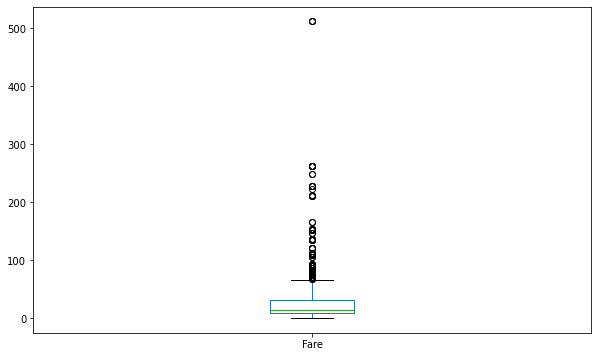

In [19]:
Train['Fare'].plot(kind='box', figsize=(10,6))

plt.show()


In [20]:
Train.sort_values(['Fare'], ascending=True, axis=0).head(16)

,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3
806,0,0,0.0,0,0,1,0,1,1,0,0
674,0,0,0.0,0,0,1,0,1,0,1,0
302,0,0,0.0,0,0,1,0,1,0,0,1
179,0,0,0.0,0,0,1,0,1,0,0,1
633,0,0,0.0,0,0,1,0,1,1,0,0
413,0,0,0.0,0,0,1,0,1,0,1,0
597,0,0,0.0,0,0,1,0,1,0,0,1
815,0,0,0.0,0,0,1,0,1,1,0,0
822,0,0,0.0,0,0,1,0,1,1,0,0
277,0,0,0.0,0,0,1,0,1,0,1,0


In [21]:
Train = Train.drop(Train.index[[806, 674, 302, 179, 633, 413, 597, 815, 822, 277, 271, 732, 466, 481, 263, 679, 258, 737]])

In [22]:
Train.sort_values(['Fare'], ascending=False, axis=0).head(10)

,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3
438,1,4,263.0,0,0,1,0,1,1,0,0
341,3,2,263.0,0,0,1,1,0,1,0,0
27,3,2,263.0,0,0,1,0,1,1,0,0
88,3,2,263.0,0,0,1,1,0,1,0,0
311,2,2,262.0,1,0,0,1,0,1,0,0
742,2,2,262.0,1,0,0,1,0,1,0,0
118,0,1,248.0,1,0,0,0,1,1,0,0
299,0,1,248.0,1,0,0,1,0,1,0,0
380,0,0,228.0,1,0,0,1,0,1,0,0
557,0,0,228.0,1,0,0,0,1,1,0,0


In [120]:
X = Train[[ 'Fare', 'Q', 'female', 'male',3]]
X[0:5]

,Fare,Q,female,male,3
0,7.0,0,0,1,1
1,71.0,0,1,0,0
2,8.0,0,1,0,1
3,53.0,0,1,0,0
4,8.0,0,0,1,1


In [25]:
Train0 = Train0.drop(Train0.index[[806, 674, 302, 179, 633, 413, 597, 815, 822, 277, 271, 732, 466, 481, 263, 679, 258, 737]])

In [26]:
Y = Train0.iloc[:,1]
Y[0:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (785, 5) (785,)
Test set: (88, 5) (88,)


In [122]:

ks=15
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
confustionMx = [];
for n in range(1,ks):
    neigh1 = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train)
    yhat = neigh1.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1] = np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.71590909, 0.78409091, 0.84090909, 0.80681818, 0.80681818,
       0.79545455, 0.80681818, 0.82954545, 0.81818182, 0.78409091,
       0.78409091, 0.81818182, 0.81818182, 0.79545455])

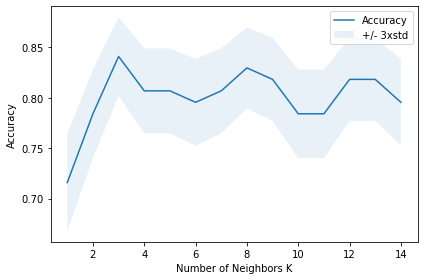

In [123]:
plt.plot(range(1,ks), mean_acc)
plt.fill_between(range(1,ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.legend(('Accuracy','+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors K')
plt.tight_layout()
plt.show()

In [124]:
K=3
neigh = KNeighborsClassifier(n_neighbors = K).fit(X_train, Y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [125]:
Tree = DecisionTreeClassifier(criterion="entropy").fit(X_train, Y_train)
Tree

DecisionTreeClassifier(criterion='entropy')

In [126]:
SVM = svm.SVC(kernel='linear').fit(X_train, Y_train)

In [127]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [128]:
knn_pred = neigh.predict(X_test)
Jccd_knn = jaccard_score(Y_test, knn_pred)
F1_knn = f1_score(Y_test, knn_pred, average='weighted')

tree_pred = Tree.predict(X_test)
Jccd_tree = jaccard_score(Y_test, tree_pred)
F1_tree = f1_score(Y_test, tree_pred, average='weighted')

svm_pred = SVM.predict(X_test)
Jccd_svm = jaccard_score(Y_test, svm_pred)
F1_svm = f1_score(Y_test, svm_pred, average='weighted')

lr_pred = LR.predict(X_test)
lr_proba = LR.predict_proba(X_test)
Jccd_lr = jaccard_score(Y_test, lr_pred)
F1_lr = f1_score(Y_test, lr_pred, average='weighted')
Log_lr = log_loss(Y_test, lr_proba)

List_jccd = [Jccd_knn, Jccd_tree, Jccd_svm, Jccd_lr]
List_F1 = [F1_knn, F1_tree, F1_svm, F1_lr]
List_log = ['N/a', 'N/a', 'N/a', Log_lr]

df1 = pd.DataFrame(List_jccd, index=['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'])
df1.columns.name = 'Algorithm'
df1.columns = ['Jaccard']
df1.insert(loc=1, column='F1-score', value=List_F1)
df1.insert(loc=2, column='LogLoss', value=List_log)
df1

,Jaccard,F1-score,LogLoss
KNN,0.658537,0.839176,N/a
Decision Tree,0.717949,0.873203,N/a
SVM,0.586957,0.784522,N/a
LogisticRegression,0.560976,0.789976,0.510637


In [90]:
Train0.iloc[:,1]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 873, dtype: int64

In [91]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X_train,Y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

     Specs        Score
2     Fare  2780.618830
6   female   147.233710
7     male    83.923215
8        1    45.784648
10       3    40.161497
3        C    13.828779
9        2    10.598148
1    Parch     8.606873
5        S     3.731051
0    SibSp     1.043326


[0.05967712 0.0786829  0.26620312 0.01179138 0.00884416 0.01655587
 0.19540563 0.20268232 0.05181756 0.02256138 0.08577855]


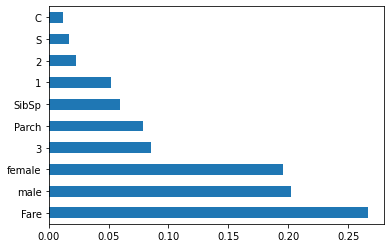

In [92]:

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()